## <font color='lightblue'>Lab Exercises Enhancements: Logistic Regression</font>

* To clarify certain concepts already presented.
* To explore more advanced concept of the lab materials.
* To provide visualizations to aid deeper understanding of the lab materials.
* To apply the materials to real-world datasets to further demonstrate how those materials
can be used.
* To compare different between the various methods, approaches, or models.
* To demonstrate the advantages and disadvantages of various methods, approaches, or
models.

Import libraries

In [53]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import os
os.chdir("C:\\Users\\acer\\Desktop\\DS & ML\\tutorial\\ML labs MMU\\assignmentlabs")

## <font color='lightblue'>Types of Logistic Regression</font>

### 1. Binary Logistic Regression
- **Description:** Predicts the probability of an observation belonging to one of two classes (0 or 1).
- **Example:** Predicting whether an email is spam (1) or not (0).

### 2. Multiclass Logistic Regression
- **Description:** Extends logistic regression to handle more than two classes.
- **Also Known As:** Multinomial Logistic Regression.
- **Example:** Predicting the genre of a movie (Action, Drama, Comedy).

### 3. Single-Predictor Logistic Regression
- **Description:** Involves one independent variable to predict binary outcomes.
- **Example:** Predicting student pass/fail based on hours of study.

### 4. Multiple Logistic Regression
- **Description:** Uses multiple independent variables for binary classification.
- **Example:** Predicting loan approval based on income, credit score, and age.




### <font color='lightyellow'>Multiple Logistic Regression </font>

In [33]:
loan_df = pd.read_csv('loan_data.csv')
loan_df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [34]:
loan_df['previous_loan_defaults_on_file'] = loan_df['previous_loan_defaults_on_file'].replace({'Yes':0,'No':1})

In [47]:
cols = ['previous_loan_defaults_on_file','loan_int_rate','loan_percent_income','cb_person_cred_hist_length','credit_score']
X = loan_df[cols] # Features
y = loan_df.loan_status # Target variable

In [48]:
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 16)

In [49]:
# instantiate the model (using the default parameters)
model = LogisticRegression(random_state = 16, max_iter = 200)

model.fit(X_train, y_train)

# Test using test set
y_test_pred = model.predict(X_test)

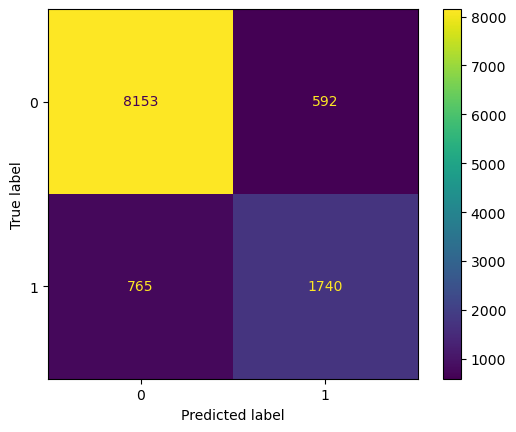

In [50]:
c_matrix = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=c_matrix,
                             )
disp.plot()
plt.show()


In [51]:
target_names = ['loan accepted', 'loan not accepted']

report = classification_report(y_test, y_test_pred, target_names = target_names)
print(report)


                   precision    recall  f1-score   support

    loan accepted       0.91      0.93      0.92      8745
loan not accepted       0.75      0.69      0.72      2505

         accuracy                           0.88     11250
        macro avg       0.83      0.81      0.82     11250
     weighted avg       0.88      0.88      0.88     11250



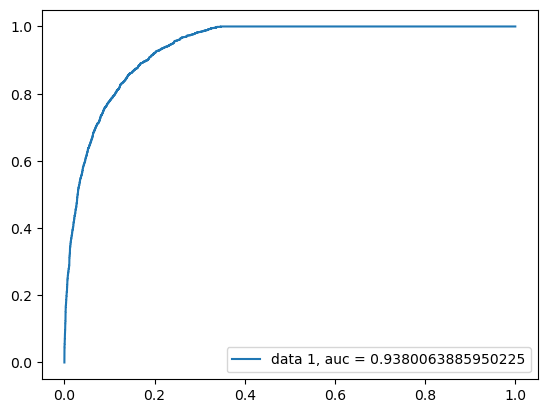

In [54]:
y_pred_proba = model.predict_proba(X_test)[::, 1]

fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)

auc = roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr, tpr, label="data 1, auc = " + str(auc))

plt.legend(loc = 4)

plt.show()

### <font color='lightyellow'>Single-Predictor Binary Logistic Regression </font>

In [61]:
cols = ['loan_amnt']
X = loan_df[cols] # Features
y = loan_df.loan_status # Target variable

In [62]:
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 16)

In [63]:
# instantiate the model (using the default parameters)
model = LogisticRegression(random_state = 16, max_iter = 200)

model.fit(X_train, y_train)

# Test using test set
y_test_pred = model.predict(X_test)

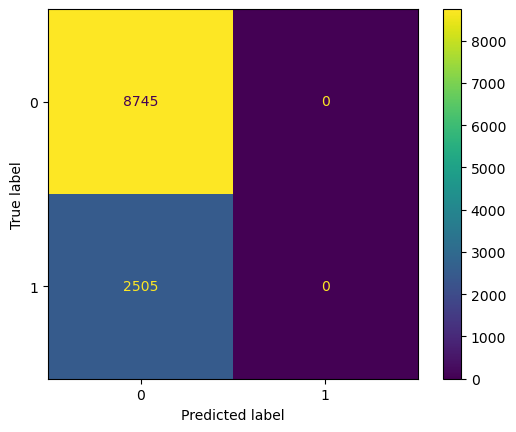

In [64]:
c_matrix = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=c_matrix,
                             )
disp.plot()
plt.show()


In [65]:
target_names = ['loan accepted', 'loan not accepted']

report = classification_report(y_test, y_test_pred, target_names = target_names)
print(report)


                   precision    recall  f1-score   support

    loan accepted       0.78      1.00      0.87      8745
loan not accepted       0.00      0.00      0.00      2505

         accuracy                           0.78     11250
        macro avg       0.39      0.50      0.44     11250
     weighted avg       0.60      0.78      0.68     11250



C:\Users\acer\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\acer\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\acer\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


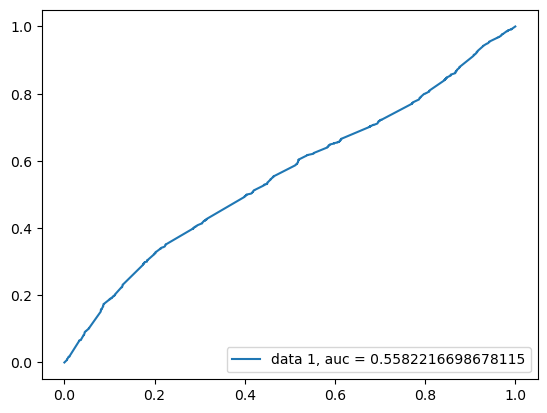

In [66]:
y_pred_proba = model.predict_proba(X_test)[::, 1]

fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)

auc = roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr, tpr, label="data 1, auc = " + str(auc))

plt.legend(loc = 4)

plt.show()

### <font color='cyan'>multiclass log regression: OVR approach </font>

In [93]:
from sklearn.datasets import load_iris
iris = load_iris()
X, y = iris.data, iris.target

print(X)
print(y)
print(X.shape)
print(y.shape)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 0)

print(X_train)
print(X_test)
print(y_train)
print(y_test)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

[[6.4 3.1 5.5 1.8]
 [5.4 3.  4.5 1.5]
 [5.2 3.5 1.5 0.2]
 [6.1 3.  4.9 1.8]
 [6.4 2.8 5.6 2.2]
 [5.2 2.7 3.9 1.4]
 [5.7 3.8 1.7 0.3]
 [6.  2.7 5.1 1.6]
 [5.9 3.  4.2 1.5]
 [5.8 2.6 4.  1.2]
 [6.8 3.  5.5 2.1]
 [4.7 3.2 1.3 0.2]
 [6.9 3.1 5.1 2.3]
 [5.  3.5 1.6 0.6]
 [5.4 3.7 1.5 0.2]
 [5.  2.  3.5 1. ]
 [6.5 3.  5.5 1.8]
 [6.7 3.3 5.7 2.5]
 [6.  2.2 5.  1.5]
 [6.7 2.5 5.8 1.8]
 [5.6 2.5 3.9 1.1]
 [7.7 3.  6.1 2.3]
 [6.3 3.3 4.7 1.6]
 [5.5 2.4 3.8 1.1]
 [6.3 2.7 4.9 1.8]
 [6.3 2.8 5.1 1.5]
 [4.9 2.5 4.5 1.7]
 [6.3 2.5 5.  1.9]
 [7.  3.2 4.7 1.4]
 [6.5 3.  5.2 2. ]
 [6.  3.4 4.5 1.6]
 [4.8 3.1 1.6 0.2]
 [5.8 2.7 5.1 1.9]
 [5.6 2.7 4.2 1.3]
 [5.6 2.9 3.6 1.3]
 [5.5 2.5 4.  1.3]
 [6.1 3.  4.6 1.4]
 [7.2 3.2 6.  1.8]
 [5.3 3.7 1.5 0.2]
 [4.3 3.  1.1 0.1]
 [6.4 2.7 5.3 1.9]
 [5.7 3.  4.2 1.2]
 [5.4 3.4 1.7 0.2]
 [5.7 4.4 1.5 0.4]
 [6.9 3.1 4.9 1.5]
 [4.6 3.1 1.5 0.2]
 [5.9 3.  5.1 1.8]
 [5.1 2.5 3.  1.1]
 [4.6 3.4 1.4 0.3]
 [6.2 2.2 4.5 1.5]
 [7.2 3.6 6.1 2.5]
 [5.7 2.9 4.2 1.3]
 [4.8 3.  1.

In [95]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

print("X_train.shape =", X_train.shape)

X_test = scaler.transform(X_test)
print("X_test.shape =", X_test.shape)

X_train.shape = (120, 4)
X_test.shape = (30, 4)


In [96]:
model = LogisticRegression(solver='liblinear', C=0.05, multi_class='ovr',
                           random_state=0)

model.fit(X_train, y_train)

C:\Users\acer\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(C=0.05, multi_class='ovr', random_state=0,
                   solver='liblinear')

In [106]:
print("y_train =", y_train)

y_train_pred = model.predict(X_train)
print("y_train_pred =", y_train_pred)

print("y_test =", y_test)

y_test_pred = model.predict(X_test)
print("y_test_pred =", y_test_pred)

mean_accuracy_train = model.score(X_train, y_train)
print(f"mean_accuracy_train = {mean_accuracy_train}")

mean_accuracy_test = model.score(X_test, y_test)
print(f"mean_accuracy_test = {mean_accuracy_test}")


y_train = [2 1 0 2 2 1 0 1 1 1 2 0 2 0 0 1 2 2 2 2 1 2 1 1 2 2 2 2 1 2 1 0 2 1 1 1 1
 2 0 0 2 1 0 0 1 0 2 1 0 1 2 1 0 2 2 2 2 0 0 2 2 0 2 0 2 2 0 0 2 0 0 0 1 2
 2 0 0 0 1 1 0 0 1 0 2 1 2 1 0 2 0 2 0 0 2 0 2 1 1 1 2 2 1 1 0 1 2 2 0 1 1
 1 1 0 0 0 2 1 2 0]
y_train_pred = [2 2 0 2 2 2 0 2 2 1 2 0 2 0 0 1 2 2 2 2 1 2 2 1 2 2 2 2 0 2 0 0 2 2 1 2 2
 2 0 0 2 1 0 0 1 0 2 1 0 2 2 2 0 2 2 2 2 0 0 2 2 0 2 0 2 2 0 0 1 0 0 0 2 2
 2 0 0 0 2 1 0 0 1 0 2 1 0 1 0 2 0 2 0 0 2 0 2 1 1 1 2 2 2 2 0 1 2 2 0 1 2
 2 1 0 0 0 2 1 2 0]
y_test = [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0]
y_test_pred = [2 1 0 2 0 2 0 1 1 1 2 1 1 1 2 0 2 2 0 0 2 2 0 0 2 0 0 1 1 0]
mean_accuracy_train = 0.8333333333333334
mean_accuracy_test = 0.8666666666666667


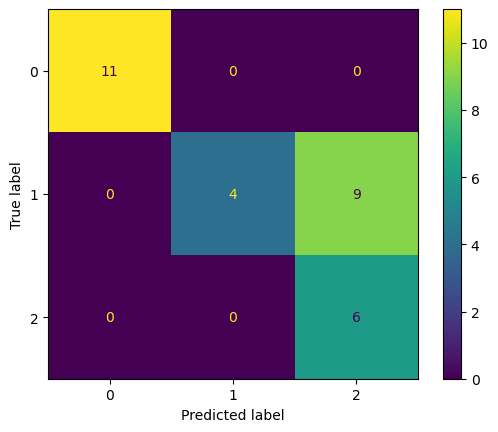

In [98]:
c_matrix = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=c_matrix,
                             )
disp.plot()
plt.show()

In [99]:
report = classification_report(y_test, y_test_pred)
print(report)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.31      0.47        13
           2       0.40      1.00      0.57         6

    accuracy                           0.70        30
   macro avg       0.80      0.77      0.68        30
weighted avg       0.88      0.70      0.68        30



### <font color='lightgreen'>multiclass log regression: softmax approach </font>

In [114]:
from sklearn.datasets import load_iris
iris = load_iris()
X, y = iris.data, iris.target

print(X)
print(y)
print(X.shape)
print(y.shape)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 0)

print(X_train)
print(X_test)
print(y_train)
print(y_test)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

[[6.4 3.1 5.5 1.8]
 [5.4 3.  4.5 1.5]
 [5.2 3.5 1.5 0.2]
 [6.1 3.  4.9 1.8]
 [6.4 2.8 5.6 2.2]
 [5.2 2.7 3.9 1.4]
 [5.7 3.8 1.7 0.3]
 [6.  2.7 5.1 1.6]
 [5.9 3.  4.2 1.5]
 [5.8 2.6 4.  1.2]
 [6.8 3.  5.5 2.1]
 [4.7 3.2 1.3 0.2]
 [6.9 3.1 5.1 2.3]
 [5.  3.5 1.6 0.6]
 [5.4 3.7 1.5 0.2]
 [5.  2.  3.5 1. ]
 [6.5 3.  5.5 1.8]
 [6.7 3.3 5.7 2.5]
 [6.  2.2 5.  1.5]
 [6.7 2.5 5.8 1.8]
 [5.6 2.5 3.9 1.1]
 [7.7 3.  6.1 2.3]
 [6.3 3.3 4.7 1.6]
 [5.5 2.4 3.8 1.1]
 [6.3 2.7 4.9 1.8]
 [6.3 2.8 5.1 1.5]
 [4.9 2.5 4.5 1.7]
 [6.3 2.5 5.  1.9]
 [7.  3.2 4.7 1.4]
 [6.5 3.  5.2 2. ]
 [6.  3.4 4.5 1.6]
 [4.8 3.1 1.6 0.2]
 [5.8 2.7 5.1 1.9]
 [5.6 2.7 4.2 1.3]
 [5.6 2.9 3.6 1.3]
 [5.5 2.5 4.  1.3]
 [6.1 3.  4.6 1.4]
 [7.2 3.2 6.  1.8]
 [5.3 3.7 1.5 0.2]
 [4.3 3.  1.1 0.1]
 [6.4 2.7 5.3 1.9]
 [5.7 3.  4.2 1.2]
 [5.4 3.4 1.7 0.2]
 [5.7 4.4 1.5 0.4]
 [6.9 3.1 4.9 1.5]
 [4.6 3.1 1.5 0.2]
 [5.9 3.  5.1 1.8]
 [5.1 2.5 3.  1.1]
 [4.6 3.4 1.4 0.3]
 [6.2 2.2 4.5 1.5]
 [7.2 3.6 6.1 2.5]
 [5.7 2.9 4.2 1.3]
 [4.8 3.  1.

In [116]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

print("X_train.shape =", X_train.shape)

X_test = scaler.transform(X_test)
print("X_test.shape =", X_test.shape)

X_train.shape = (120, 4)
X_test.shape = (30, 4)


In [117]:
model = LogisticRegression(C = 20, random_state = 42,
                           tol = 1e-10, max_iter = 1000,
                           multi_class = "multinomial"  # "auto", "ovr" or "multinomial"
                           )

model.fit(X, y)

C:\Users\acer\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(C=20, max_iter=1000, multi_class='multinomial',
                   random_state=42, tol=1e-10)

In [118]:
print("y_train =", y_train)

y_train_pred = model.predict(X_train)
print("y_train_pred =", y_train_pred)

print("y_test =", y_test)

y_test_pred = model.predict(X_test)
print("y_test_pred =", y_test_pred)

mean_accuracy_train = model.score(X_train, y_train)
print(f"mean_accuracy_train = {mean_accuracy_train}")

mean_accuracy_test = model.score(X_test, y_test)
print(f"mean_accuracy_test = {mean_accuracy_test}")


y_train = [2 1 0 2 2 1 0 1 1 1 2 0 2 0 0 1 2 2 2 2 1 2 1 1 2 2 2 2 1 2 1 0 2 1 1 1 1
 2 0 0 2 1 0 0 1 0 2 1 0 1 2 1 0 2 2 2 2 0 0 2 2 0 2 0 2 2 0 0 2 0 0 0 1 2
 2 0 0 0 1 1 0 0 1 0 2 1 2 1 0 2 0 2 0 0 2 0 2 1 1 1 2 2 1 1 0 1 2 2 0 1 1
 1 1 0 0 0 2 1 2 0]
y_train_pred = [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
y_test = [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0]
y_test_pred = [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
mean_accuracy_train = 0.325
mean_accuracy_test = 0.36666666666666664


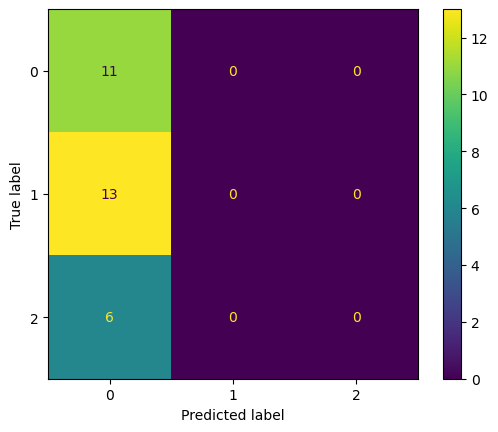

In [119]:
c_matrix = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=c_matrix,
                             )
disp.plot()
plt.show()

In [120]:
report = classification_report(y_test, y_test_pred)
print(report)


              precision    recall  f1-score   support

           0       0.37      1.00      0.54        11
           1       0.00      0.00      0.00        13
           2       0.00      0.00      0.00         6

    accuracy                           0.37        30
   macro avg       0.12      0.33      0.18        30
weighted avg       0.13      0.37      0.20        30



C:\Users\acer\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\acer\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\acer\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
